<a href="https://colab.research.google.com/github/Joan-Kamau/Karamoja-Food-Insecurity-Analysis/blob/main/Karamoja_Food_Security_Analysis_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Karamoja is a region in Uganda that is notable for the severe nature of its food insecurity. This has been caused by low productivity levels brought about by  intense droughts and pest disease outbreaks.

This analysis seeks to develop a food security monitoring tool to shed light on the entire state of the region for NGOs providing technical support and farm inputs to the area.

Through this, the study will look at the two staple crops in the region- Maize and Sorghum. The yields of the crops will be analyzed and compared.

Visualizations have been prepared on Tableau.

TABLEAU LINK: https://public.tableau.com/views/KaramojaFoodYieldAnalysis/KaramojaMaizeSorghumYieldAnalysisperDistrict?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

I will make use of some Python libraries as shown below to help with analysis and data cleaning.

In [ ]:
#Import python libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datasets used:


The datasets used in my data cleaning and analysis are:
- Karamoja District Crop Yield Population
-Karamoja Subcounty Crop Yield Population

In [ ]:
#Load data and preview the top rows

district_crop_yield= pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
district_crop_yield.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
#Check dataset info
district_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [ ]:
#Check for missing values if any

district_crop_yield.isna().sum()

,0
OBJECTID,0
NAME,0
POP,0
Area,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0
M_Area_Ha,0
S_Prod_Tot,0


In [ ]:
#Check for any duplicates

district_crop_yield.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False


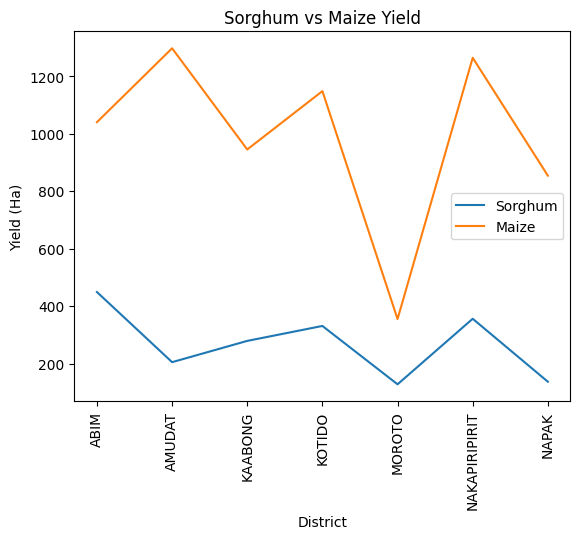

In [ ]:
#Create Line plots showing the Sorghum and Maize yield
plt.plot(district_crop_yield['NAME'], district_crop_yield['S_Yield_Ha'])
plt.plot(district_crop_yield['NAME'], district_crop_yield['M_Yield_Ha'])

#Customize graph by labelling axis and setting title
plt.xlabel('District')
plt.ylabel('Yield (Ha)')
plt.title('Sorghum vs Maize Yield')
plt.xticks(rotation=90)

#Add legend to distinguish the products
plt.legend(['Sorghum', 'Maize'])
plt.show()


  The above line plot compares the average yield of the 2 staple crops(Sorghum and Maize) in the Karamoja region per district. The plot illustrates that the yield of maize is significantly higher than that of sorghum in the above districts.

  It also shows that Moroto district had the lowest yield of both Sorghum and Maize.

In [ ]:
#Load the Sub-county dataset and show the top rows

subcounty_yield= pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
subcounty_yield.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [ ]:
#Load sub-county dataset information

subcounty_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [ ]:
#Preview the top 10 rows in the sub-county dataset

subcounty_yield.head(10)

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,179681.139000
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,10181.201000
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,22772.636430
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,59450.189420
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,209806.097000


In [ ]:
#Check for any missing values
subcounty_yield.isna().sum()

,0
OBJECTID,0
SUBCOUNTY_NAME,0
DISTRICT_NAME,0
POP,0
Area,0
Karamoja,0
S_Yield_Ha,0
M_Yield_Ha,0
Crop_Area_Ha,0
S_Area_Ha,0


In [ ]:
#Check for any duplicates

subcounty_yield.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


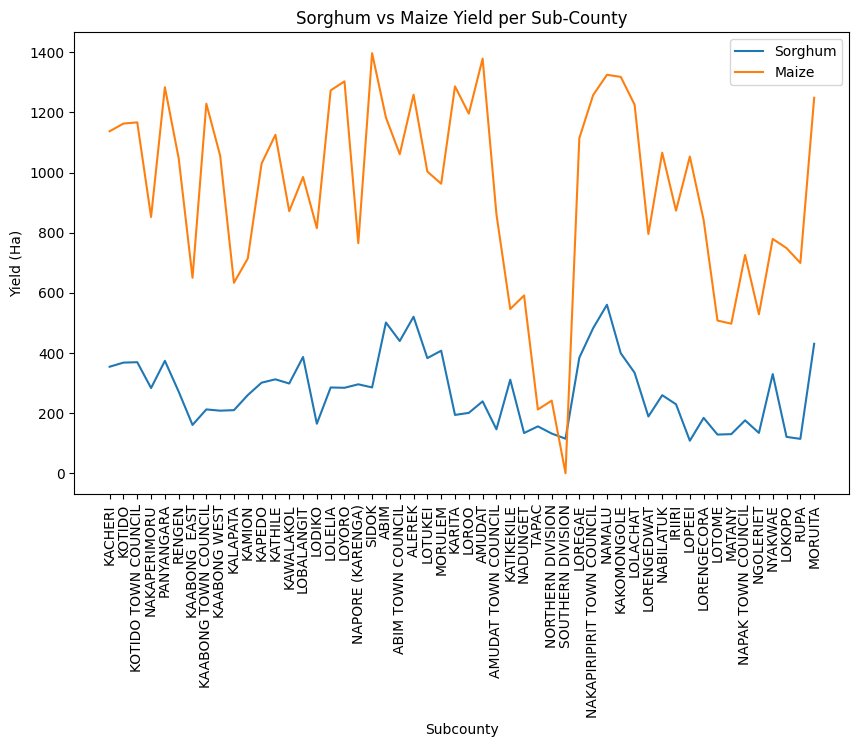

In [ ]:
#Create a line plot for the sorghum and maize yield
plt.figure(figsize=(10,6))
plt.plot(subcounty_yield['SUBCOUNTY_NAME'], subcounty_yield['S_Yield_Ha'])
plt.plot(subcounty_yield['SUBCOUNTY_NAME'], subcounty_yield['M_Yield_Ha'])

#Label axis and title
plt.xlabel('Subcounty')
plt.ylabel('Yield (Ha)')
plt.title('Sorghum vs Maize Yield per Sub-County')
plt.legend(['Sorghum', 'Maize'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Replace name with district name to ensure column name on the column to be merged
district_crop_yield.rename(columns={'NAME':'DISTRICT_NAME'}, inplace=True)
district_crop_yield.head()


,OBJECTID,DISTRICT_NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [ ]:
#Merge the district and sub-county datasets
merged_data= pd.merge(subcounty_yield, district_crop_yield, on='DISTRICT_NAME')
merged_data.head()

,OBJECTID_x,SUBCOUNTY_NAME,DISTRICT_NAME,POP_x,Area_x,Karamoja,S_Yield_Ha_x,M_Yield_Ha_x,Crop_Area_Ha_x,S_Area_Ha_x,...,OBJECTID_y,POP_y,Area_y,S_Yield_Ha_y,M_Yield_Ha_y,Crop_Area_Ha_y,S_Area_Ha_y,M_Area_Ha_y,S_Prod_Tot_y,M_Prod_Tot_y
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,...,85,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,...,85,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,...,85,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,...,85,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,...,85,243157,3641539808,331,1148,53032.64945,50247.4439,1751.372284,16631904,2010575


In [ ]:
# Check info on merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID_x      52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP_x           52 non-null     int64  
 4   Area_x          52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha_x    52 non-null     float64
 7   M_Yield_Ha_x    52 non-null     float64
 8   Crop_Area_Ha_x  52 non-null     float64
 9   S_Area_Ha_x     52 non-null     float64
 10  M_Area_Ha_x     52 non-null     float64
 11  S_Prod_Tot_x    52 non-null     float64
 12  M_Prod_Tot_x    52 non-null     float64
 13  OBJECTID_y      52 non-null     int64  
 14  POP_y           52 non-null     int64  
 15  Area_y          52 non-null     int64  
 16  S_Yield_Ha_y    52 non-null     int64  
 17  M_Yield_Ha_y    52 non-null     int64

In [ ]:
#Convert merged data into a csv
merged_data.to_csv('Karamoja_Analysis.csv', index=False)
